In [1]:
import pandas as pd #импортируем библиотеку Pandas

Для начала посмотрим на наши данные.
На количество строк и столбцов, типы данных, наличие пропущенных значений.

In [2]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig%27')

In [3]:
customers.head() #таблица уникальных идентификаторов пользователей

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
customers.isna().sum() #пропущенных значений в таблице нет

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg%27')

In [7]:
orders.head() #таблица заказов

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
# приведем все даты к формату дата.
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [10]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Есть пропущенные значения в таких калонках как: время подтверждения оплаты заказа,время передачи заказа в логистическую службу, время доставки заказа. Значит такие заказы в процесе доставки и по каким-то причинам еще не доставлены, либо присутствует ошибка.

In [11]:
order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw%27') 

In [12]:
order_items.head() #товарные позиции, входящие в заказы

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [14]:
order_items.isna().sum() # пропущенных значений в таблице нет

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
orders.order_status.value_counts() #значения статуса заказа, не все заказы завершены

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [16]:
customers_orders = customers.merge(orders, on = 'customer_id')

In [17]:
customers_orders.head() 
#объединенные таблицы уникальных идентификаторов пользователей и заказов по позаказному идентификатору пользователя

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [18]:
customers_orders.customer_unique_id.nunique() #кол-во уникальных пользователей

96096

In [19]:
customers_orders.customer_id.nunique() #кол-во уникальныx заказов

99441

# СКОЛЬКО У НАС ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ СОВЕРШИЛИ ПОКУПКУ ТОЛЬКО ОДИН РАЗ? (7 баллов) 

In [20]:
# Чтобы узнать сколько пользователей совершили покупку один раз посмотрим на значения статуса заказов.

In [21]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Для начала определим, что будет считаться покупкой. Покупкой будут считаться оплаченные заказы.
То есть, это заказы со статусами:'delivered','shipped','processing'. 

In [22]:
order_1 = customers_orders\
.query('order_status == ["delivered","shipped","processing"]')\
.groupby('customer_unique_id',as_index = False)\
.agg({'customer_id':'count'})

In [23]:
order_1.query('customer_id==1').shape[0]

91814

Количество пользователей, которые соврешили покупку только один раз = 91814

# СКОЛЬКО ЗАКАЗОВ В МЕСЯЦ В СРЕДНЕМ НЕ ДОСТАВЛЯЕТСЯ ПО РАЗНЫМ ПРИЧИНАМ (вывести детализацию по причинам)? (5 баллов)

Недоставленными заказами будут считаться заказы со статусами:'canceled','unavailable', так как эти заказы точно не были доставлены

In [24]:
# для того, чтобы найти значение по месяцам используем метод resample()

undelivered_orders = orders.query('order_status == "canceled" or order_status == "unavailable"')

In [25]:
undelivered_orders.shape[0]

1234

In [26]:
undelivered_orders = undelivered_orders.set_index('order_purchase_timestamp')

In [27]:
# ресемплируем данные по месяцам
undelivered_orders = undelivered_orders\
    .groupby('order_status')\
    .resample(rule='M').agg({'order_id': 'count'}).reset_index()\
    .rename(columns = {'order_id': 'canceled_orders_count'})

In [28]:
undelivered_orders\
.groupby('order_status', as_index = False)\
.agg({'canceled_orders_count':'mean'})\
.round()

,order_status,canceled_orders_count
0,canceled,24.0
1,unavailable,26.0


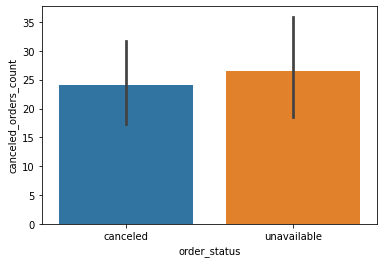

In [29]:
import seaborn as sns
sns.barplot(data = undelivered_orders, x = 'order_status', y = 'canceled_orders_count')

В среднем в месяц не доставляется 24 заказа по причине отмены и 26 заказов по причине недоступности.

# ПО КАЖДОМУ ТОВАРУ ОПРЕДЕЛИТЬ, В КАКОЙ ДЕНЬ НЕДЕЛИ ТОВАР ЧАЩЕ ВСЕГО ПОКУПАЕТСЯ. (5 баллов)

In [30]:
order_items.head() # посмотрим на таблицу с товарами

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
order_items.product_id.nunique() #кол-во уникальных товаров

32951

Для того, чтобы определить день недели купленного товара 
будем рассматривать 'order_purchase_timestamp' - время создания заказа.

In [32]:
products_orders = order_items.merge(orders, on = 'order_id') #объединили таблицы по 'order_id'

К товарам которые покупаются отнесём товары, которые были оплачены, 
это товары со статусом 'processing','shipped','delivered'

In [33]:
products_orders.query('order_status == "processing" or order_status == "shipped" or order_status == "delivered"').head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [34]:
products_orders['day_name'] = products_orders.order_purchase_timestamp.dt.day_name()

In [35]:
products_orders\
.groupby(['product_id','day_name'], as_index = False)\
.agg({'customer_id':'count'})\
.sort_values('customer_id', ascending = False)

,product_id,day_name,customer_id
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41041,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41046,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
...,...,...,...
24013,642369377615febc7fa89e4c8df5110e,Thursday,1
24018,642a40d4d73b4b2604968937de13634a,Sunday,1
24022,642e125cbc752b4eeb8faf442319c39f,Thursday,1
24025,64315bd8c0c47303179dd2e25b579d00,Saturday,1


# Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 


In [36]:
orders_customers = orders.merge(customers, on = 'customer_id') #объединили таблицы заказов и покупателей

In [37]:
orders_customers['order_month'] = orders_customers['order_purchase_timestamp'].dt.month_name() 
#создали таблицу с названием месяца

In [38]:
orders_customers['weeks_in_month'] = orders_customers.order_purchase_timestamp.dt.days_in_month / 7
# почситали количество недель в месяце

In [39]:
orders_customers = orders_customers\
    .query('order_status == "delivered"')\
    .groupby(['order_purchase_timestamp', 'order_month', 'weeks_in_month', 'customer_unique_id'], as_index=False)\
    .agg({'order_id': 'count'})

In [40]:
# с помощью метода resample() считаем понедельно среднее
orders_customers['order_purchase_timestamp'] = orders_customers\
    .set_index('order_purchase_timestamp')\
    .resample('W')\
    .agg({'order_id': 'mean'}).reset_index()\

In [41]:
orders_customers.head()

,order_purchase_timestamp,order_month,weeks_in_month,customer_unique_id,order_id
0,2016-09-18 00:00:00,September,4.285714,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-09-25 00:00:00,October,4.428571,32ea3bdedab835c3aa6cb68ce66565ef,1
2,2016-10-02 00:00:00,October,4.428571,2f64e403852e6893ae37485d5fcacdaf,1
3,2016-10-09 00:00:00,October,4.428571,61db744d2f835035a5625b59350c6b63,1
4,2016-10-16 00:00:00,October,4.428571,8d3a54507421dbd2ce0a1d58046826e0,1


In [42]:
# вычисляем среднее число покупок в неделю по месяцам 
orders_customers['orders_mean_week'] = orders_customers['order_id'] / orders_customers['weeks_in_month']

In [43]:
orders_customers.head()

,order_purchase_timestamp,order_month,weeks_in_month,customer_unique_id,order_id,orders_mean_week
0,2016-09-18 00:00:00,September,4.285714,830d5b7aaa3b6f1e9ad63703bec97d23,1,0.233333
1,2016-09-25 00:00:00,October,4.428571,32ea3bdedab835c3aa6cb68ce66565ef,1,0.225806
2,2016-10-02 00:00:00,October,4.428571,2f64e403852e6893ae37485d5fcacdaf,1,0.225806
3,2016-10-09 00:00:00,October,4.428571,61db744d2f835035a5625b59350c6b63,1,0.225806
4,2016-10-16 00:00:00,October,4.428571,8d3a54507421dbd2ce0a1d58046826e0,1,0.225806


# ИСПОЛЬЗУЯ PANDAS, ПРОВЕДИ КОГОРТНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ.
# В ПЕРИОД С ЯНВАРЯ ПО ДЕКАБРЬ ВЫЯВИ КОГОРТУ С САМЫМ ВЫСОКИМ RETENTION НА 3Й МЕСЯЦ. 


Retention - метрика, которая показывает какой процент пользователей вернулся, в нашем случае в период с января по декабрь

In [44]:
customers_cohort = orders.merge(customers, on = 'customer_id')

In [45]:
customers_cohort.order_purchase_timestamp.agg(['min', 'max']) 
#смотрим какой период входит в наши данные, следовательно для когортного анализа нам надо взять данные за январь-декабрь 2017 года. 

min   2016-09-04 21:15:19
max   2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [46]:
# оставляем данные за нужный нам период
customers_cohort = customers_cohort\
    .query('order_purchase_timestamp > "2016-12-31" and order_purchase_timestamp < "2018-01-01" and order_status == "delivered"')

In [47]:
# создаем колонку с датой в формате год-месяц
customers_cohort['period'] = customers_cohort.order_purchase_timestamp.dt.strftime('%Y-%m')

In [48]:
# создаем когорты с годом и месяцем по первой покупке
customers_cohort.set_index('customer_unique_id', inplace=True)
customers_cohort['cohort_group'] = customers_cohort.groupby(level=0)['order_purchase_timestamp'].min().dt.strftime('%Y-%m')#.dt.apply(lambda x: x.strftime('%Y-%m'))
customers_cohort.reset_index(inplace=True)

In [49]:
grouped = customers_cohort.groupby(['cohort_group', 'period'])
# количество уникальных пользователей за период
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique})
cohorts.rename(columns={'customer_unique_id': 'total_clients'}, inplace=True)

In [50]:
# Создаем периоды когорт
import numpy as np
def cohort_period(df):
     df['cohort_period'] = np.arange(len(df)) + 1
     return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [51]:
cohorts

total_clients  cohort_period
cohort_group period                               
2017-01      2017-01            718              1
             2017-02              2              2
             2017-03              2              3
             2017-04              1              4
             2017-05              3              5
...                             ...            ...
2017-10      2017-11             31              2
             2017-12             11              3
2017-11      2017-11           7061              1
             2017-12             40              2
2017-12      2017-12           5338              1

[77 rows x 2 columns]

In [52]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_period','cohort_group'], inplace=True)
cohort_group_size = cohorts['total_clients'].groupby(level=1).first()

In [53]:
cohorts['total_clients'].unstack(0)

cohort_period,1,2,3,4,5,6,7,8,9,10,11
cohort_group,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: когорта с самым высоким retention на 3й месяц - когорта с покупателями, совершившими первую покупку в сентябре 2019 года.

 ## Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [54]:
df = orders.merge(customers, on = 'customer_id')

In [55]:
df = df.merge(order_items, on = 'order_id') # объединили все три таблицы

In [56]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать баллы R, F и M по шкале от 1 (худший) до 5 (лучший).

рассчитать Recency = количество дней с момента последней покупки

рассчитать Freqency = количество покупок за исследуемый период (обычно один год)

рассчитать Monetary = общая сумма покупок, сделанных за исследуемый период

Найдите квинтили для каждого из этих измерений
дать оценку каждому измерению в зависимости от того, в каких квинтилах оно стоит
объединить баллы R, F и M, чтобы получить балл RFM
сопоставьте RF-оценки по сегментам

Для rfm анилза обычно используется период в один год, поэтому будем исследовать период январь-декабрь 2017 года.




Сначала рассчитаем Recency.

In [57]:
df = df\
    .query('order_purchase_timestamp > "2016-12-31" and order_purchase_timestamp < "2018-01-01"')\
    .query('order_status == "delivered" or order_status == "shipped" or order_status == "processing"')

In [58]:
from datetime import timedelta

In [59]:
NOW = df['order_purchase_timestamp'].max() + timedelta(days=1) # назначим дату 'сейчас'

Добавляем столбец с количеством дней между покупкой и сейчас.
Чтобы найти значения Recency - нужно будет найти минимум этого столбца для каждого клиента.

In [60]:
df['DaysSinceOrder'] = df['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [61]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,DaysSinceOrder
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,91
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,44
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,176
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,230
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,343


In [62]:
period = 365

In [63]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # находим Recency
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # рассчитываем Frequency
}
rfm = df.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000f46a3911fa3c0805444483337064,297,1
1,0000f6ccb0745a6a4b88665a16c9f078,81,1
2,0004aac84e0df4da2b147fca70cf8255,48,1
3,0005e1862207bf6ccc02e4228effd9a0,302,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1


Теперь рассчитаем Monetary

In [64]:
Monetary = df.groupby('customer_unique_id', as_index = False).agg({'price':'sum'}).rename(columns = {'price':'Monetary'})

In [65]:
Monetary

,customer_unique_id,Monetary
0,0000f46a3911fa3c0805444483337064,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,25.99
2,0004aac84e0df4da2b147fca70cf8255,180.00
3,0005e1862207bf6ccc02e4228effd9a0,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,13.90
...,...,...
42859,fffbf87b7a1a6fa8b03f081c5f51a201,149.00
42860,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
42861,fffea47cd6d3cc0a88bd621562a9d061,64.89
42862,ffff371b4d645b6ecea244b27531430a,89.90


In [66]:
rfm = rfm.merge(Monetary, how='left', on='customer_unique_id')
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,297,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90


Для оценки Recency,Frequency,Monetary  используем квантили, каждый будет содержать 33,3%.

In [67]:
# для каждого параметра находим квантили
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0, 1/3, 2/3]).to_dict()
quintiles

{'Recency': {0.0: 1.0, 0.3333333333333333: 73.0, 0.6666666666666666: 179.0},
 'Frequency': {0.0: 1.0, 0.3333333333333333: 1.0, 0.6666666666666666: 1.0},
 'Monetary': {0.0: 2.29, 0.3333333333333333: 58.99, 0.6666666666666666: 125.0}}

Методы для присвоения рангов от 1 до 5.
Меньшее значение Recency лучше, в то время как более высокие значения частоты и денежной степени лучше.
Нужно написать два отдельных метода.

In [68]:
def r_score(x):
    if x <= quintiles['Recency'][0]:
        return 3
    elif x <= quintiles['Recency'][1/3]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][0]:
        return 1
    elif x <= quintiles[c][1/3]:
        return 2
    else:
        return 3    

Для Recency (кол-во дней с последней покупки, чем больше балл - тем меньше кол-во дней с последней покупки):

1 - от 80 до 100% (давняя покупка)

2 - от 60 до 80%

3 - от 40 до 60%

4 - от 20 до 40%

5 - от 0 до 20% (недавний заказ)

Для Frequency (кол-во покупок, чем больше балл - тем больше покупок):

1 - от 0 до 20%

2- от 20 до 40%

3 - от 40 до 60%

4 - от 60 до 80%

5 - от 80 до 100%

Для Monetary (сумма покупок, чем больше балл - тем больше общая сумма покупок):

1 - от 0 до 20%

2- от 20 до 40%

3 - от 40 до 60%

4 - от 60 до 80%

5 - от 80 до 100%

Определяем баллы RFM для каждого клиента:

In [69]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

Объединяем баллы R,F,M в RFM Score:

In [70]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,3,113
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,1,1,2,112
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,2,1,3,213
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,3,113
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,1,1,2,112


#### Получилось 27 сегментов

### Уходящие:

111 - потерянные экономные

112 - одноразовые

113 - одноразовые

121 - редкие

122 - редкие

123 - редкие

131 - постоянные

132 - хорошие постоянные
 
133 - уходящие VIP

#### Спящие 

211 - разовые с маленьким чеком

212 - разовые с маленьким чеком

213 - разовые с маленьким чеком

221 - редкие с маленьким чеком

222 - редкие со средним чеком

223 - редкие с высоким чеком

231 - постоянные с маленьким чеком

232- постоянные со средним чеком

233 - постоянные с высоким чеком

#### Постоянные 

311 - новички с маленьким чеком

312 - новички со средним чеком

313 - новички с высоким чеком. Потенциальные VIP.

321 - постоянные с маленьким чеком

322 - постоянные со средним чеком

323 - постоянные с высоким чеком

331 - постоянные с маленьким чеком

332 - постоянные со средним чеком

333 - VIP


In [71]:
# создадим датафрейм для визуализации
rfm_result = rfm.groupby('RFM_Score',as_index = False).agg({'customer_unique_id':'count'}).rename(columns = {'customer_unique_id':'customers'})

In [72]:
import matplotlib.pyplot as plt

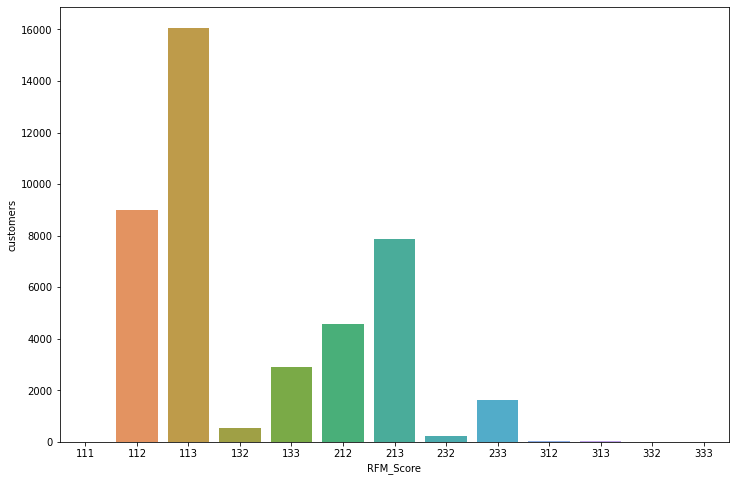

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(data = rfm_result, x = 'RFM_Score', y = 'customers' )

### Вывод:

Исходя из графика видно, что большинство клиентов относятся к уходящим. Однако, клиенты могут перетекать из сегмента в сегмент. Те, кто покупал много, могут перестать делать покупки, а «спящие» клиенты могут проснуться и стать постоянными покупателями.

Необходимо поработать над целевыми маркетинговыми кампаниями, чтобы удержать клиентов, находящихся в группе риска, улучшить продажи клиентам с некоторым потенциалом и вознаградить лучших клиентов.
